In [2]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8) #This will adjust the configuration of the plots we will create

#read in the data
df=pd.read_csv(r"C:\Users\brajk\Desktop\Data Analytics Projects\Python Movie data correlation portfolio project\movies.csv")

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
#Missing data check
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}'.format(col,pct_missing))
    

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [5]:
df['rating'] = df['rating'].replace([np.nan],['Not Rated'])
df['released']=df['released'].replace([np.nan],['Missing'])
df['score']=df['score'].replace([np.nan],df['score'].mean())
df['votes']=df['votes'].replace([np.nan],int(df['votes'].mean()))
df['writer']=df['writer'].replace([np.nan],['Missing'])
df['star']=df['star'].replace([np.nan],['Missing'])
df['country']=df['country'].replace([np.nan],['Missing'])
df['budget']=df['budget'].replace([np.nan],int(df['budget'].mean()))
df['gross']=df['gross'].replace([np.nan],int(df['gross'].mode()[0]))
df['company']=df['company'].replace([np.nan],df['company'].mode()[0])
df['runtime']=df['runtime'].replace([np.nan],int(df['runtime'].mean()))

In [6]:
#Missing data check
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}'.format(col,pct_missing))

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#change data types of columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [12]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7663                                    More to Life  Not Rated      Drama   
7664                                     Dream Round  Not Rated     Comedy   
7665                                   Saving Mbango  Not Rated      Drama   
7666                                    It's Just Us  Not Rated      Drama   
7667                                       Tee em el  Not Rated     Horror   

      year                          released     score      votes  \
0     1980     June 13, 1980 (United States)  8.400000   927000.0   
1     1980      July 2, 1980 (United States)  5.800000    65000.0   
2     1980     June 20, 1980 (United States)  8.700000  1200000.0   
3     1980      July 2, 1980 (United States)  7.700000   221000.0   
4     1980     July 25, 1980 (United States)  7.300000   108000.0   
...    ...                               ...       ...        ...   
7663  2020  October 23, 2020 (United States)  3.100000       18.0   
7664  2020  February 7, 2020 (United States)  4.700000       36.0   
7665  2020         April 27, 2020 (Cameroon)  5.700000       29.0   
7666  2020   October 1, 2020 (United States)  6.390411    88108.0   
7667  2020   August 19, 2020 (United States)  5.700000        7.0   

             director                   writer              star  \
0     Stanley Kubrick             Stephen King    Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole    Brooke Shields   
2      Irvin Kershner           Leigh Brackett       Mark Hamill   
3        Jim Abrahams             Jim Abrahams       Robert Hays   
4        Harold Ramis       Brian Doyle-Murray       Chevy Chase   
...               ...                      ...               ...   
7663    Joseph Ebanks            Joseph Ebanks      Shannon Bond   
7664     Dusty Dukatz              Lisa Huston  Michael Saquella   
7665     Nkanya Nkwai             Lynno Lovert      Onyama Laura   
7666    James Randall            James Randall     Christina Roz   
7667     Pereko Mosia             Pereko Mosia  Siyabonga Mabaso   

             country    budget      gross                    company  runtime  
0     United Kingdom  19000000   46998772               Warner Bros.    146.0  
1      United States   4500000   58853106          Columbia Pictures    104.0  
2      United States  18000000  538375067                  Lucasfilm    124.0  
3      United States   3500000   83453539         Paramount Pictures     88.0  
4      United States   6000000   39846344             Orion Pictures     98.0  
...              ...       ...        ...                        ...      ...  
7663   United States      7000   14000000         Universal Pictures     90.0  
7664   United States  35589876   14000000  Cactus Blue Entertainment     90.0  
7665   United States     58750   14000000           Embi Productions    107.0  
7666   United States     15000   14000000         Universal Pictures    120.0  
7667    South Africa  35589876   14000000                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [65]:
#Create correct year column
l=pd.Series()
l=df['released'].str.split(',',n=1,expand=True)[1]
df['yearcorrect']=l.str.split('(',n=1,expand=True)[0]

df

C:\Users\brajk\AppData\Local\Temp\ipykernel_17200\1877390102.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  l=pd.Series()


name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7663                                    More to Life  Not Rated      Drama   
7664                                     Dream Round  Not Rated     Comedy   
7665                                   Saving Mbango  Not Rated      Drama   
7666                                    It's Just Us  Not Rated      Drama   
7667                                       Tee em el  Not Rated     Horror   

      year                          released     score      votes  \
0     1980     June 13, 1980 (United States)  8.400000   927000.0   
1     1980      July 2, 1980 (United States)  5.800000    65000.0   
2     1980     June 20, 1980 (United States)  8.700000  1200000.0   
3     1980      July 2, 1980 (United States)  7.700000   221000.0   
4     1980     July 25, 1980 (United States)  7.300000   108000.0   
...    ...                               ...       ...        ...   
7663  2020  October 23, 2020 (United States)  3.100000       18.0   
7664  2020  February 7, 2020 (United States)  4.700000       36.0   
7665  2020         April 27, 2020 (Cameroon)  5.700000       29.0   
7666  2020   October 1, 2020 (United States)  6.390411    88108.0   
7667  2020   August 19, 2020 (United States)  5.700000        7.0   

             director                   writer              star  \
0     Stanley Kubrick             Stephen King    Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole    Brooke Shields   
2      Irvin Kershner           Leigh Brackett       Mark Hamill   
3        Jim Abrahams             Jim Abrahams       Robert Hays   
4        Harold Ramis       Brian Doyle-Murray       Chevy Chase   
...               ...                      ...               ...   
7663    Joseph Ebanks            Joseph Ebanks      Shannon Bond   
7664     Dusty Dukatz              Lisa Huston  Michael Saquella   
7665     Nkanya Nkwai             Lynno Lovert      Onyama Laura   
7666    James Randall            James Randall     Christina Roz   
7667     Pereko Mosia             Pereko Mosia  Siyabonga Mabaso   

             country    budget      gross                    company  runtime  \
0     United Kingdom  19000000   46998772               Warner Bros.    146.0   
1      United States   4500000   58853106          Columbia Pictures    104.0   
2      United States  18000000  538375067                  Lucasfilm    124.0   
3      United States   3500000   83453539         Paramount Pictures     88.0   
4      United States   6000000   39846344             Orion Pictures     98.0   
...              ...       ...        ...                        ...      ...   
7663   United States      7000   14000000         Universal Pictures     90.0   
7664   United States  35589876   14000000  Cactus Blue Entertainment     90.0   
7665   United States     58750   14000000           Embi Productions    107.0   
7666   United States     15000   14000000         Universal Pictures    120.0   
7667    South Africa  35589876   14000000                PK 65 Films    102.0   

     yearcorrect  
0          1980   
1          1980   
2          1980   
3          1980   
4          1980   
...          ...  
7663       2020   
7664       2020   
7665       2020   
7666       2020   
7667       2020   

[7668 rows x 16 columns]

In [64]:
# l=pd.Series()
# l=df['released'].str.split(',',n=1,expand=True)[1]
# l
# m=pd.Series()
# m=l.str.split('(',n=1,expand=True)[0]
# m

C:\Users\brajk\AppData\Local\Temp\ipykernel_17200\3675682196.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  l=pd.Series()
C:\Users\brajk\AppData\Local\Temp\ipykernel_17200\3675682196.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  m=pd.Series()


0        1980 
1        1980 
2        1980 
3        1980 
4        1980 
         ...  
7663     2020 
7664     2020 
7665     2020 
7666     2020 
7667     2020 
Name: 0, Length: 7668, dtype: object

In [67]:
pd.set_option('display.max_rows',None)

In [73]:
df=df.sort_values(by=['gross'],inplace=False ,ascending=False)
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0       2009   
7445  2797501328         Marvel Studios    181.0       2019   
3045  2201647264  Twentieth Century Fox    194.0       1997   
6663  2069521700              Lucasfilm    138.0       2015   
7244  2048359754         Marvel Studios    149.0       2018

In [69]:
#Budget High correlation
#Company High correlation

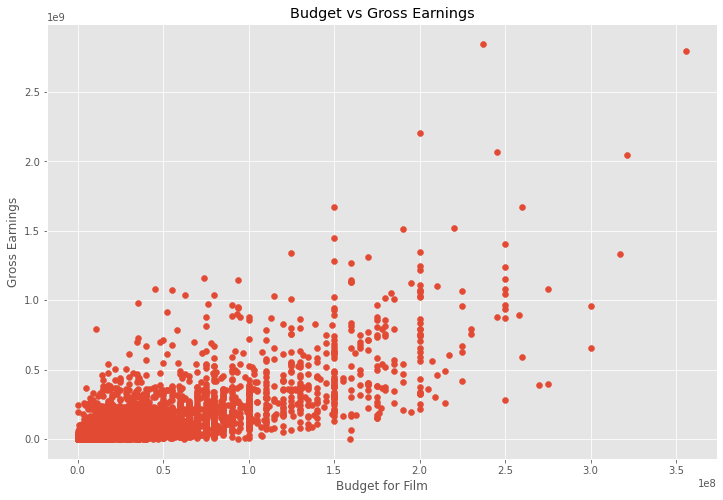

In [72]:
#Budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

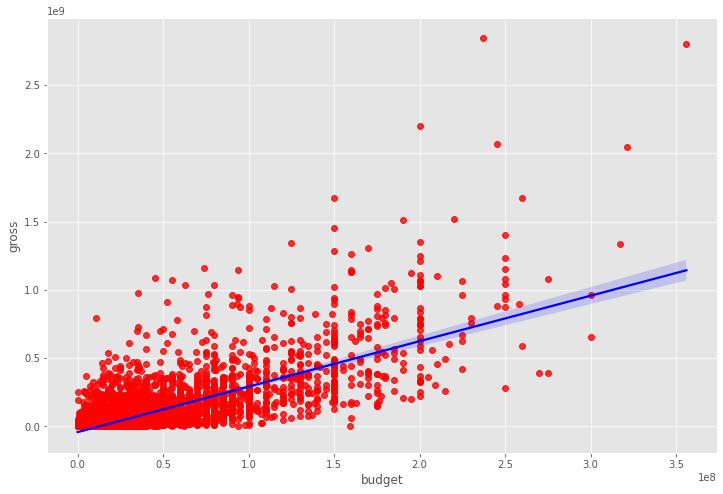

In [75]:
#Budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [78]:
#Correlation
df.corr(method='pearson')   #methods-pearson,kendall,spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.097936  0.222810  0.265578  0.260251  0.120758
score    0.097936  1.000000  0.409182  0.064541  0.185833  0.399335
votes    0.222810  0.409182  1.000000  0.421007  0.632334  0.309168
budget   0.265578  0.064541  0.421007  1.000000  0.712717  0.265289
gross    0.260251  0.185833  0.632334  0.712717  1.000000  0.244633
runtime  0.120758  0.399335  0.309168  0.265289  0.244633  1.000000

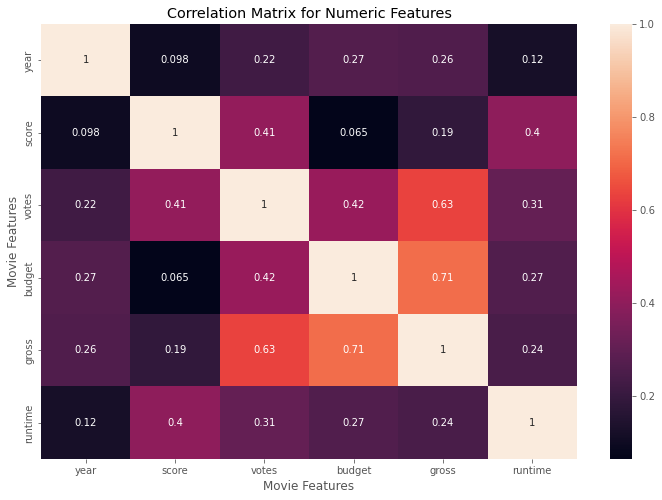

In [80]:
correlation_matrix=df.corr(method='pearson') 
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [82]:
#Numerical Reference for company
df_numeric=df
for col in df_numeric.columns:
    if(df_numeric[col].dtype=='object'):
        df_numeric[col]=df_numeric[col].astype('category')
        df_numeric[col]=df_numeric[col].cat.codes
df_numeric

name  rating  genre  year  released     score      votes  director  \
5445   533       5      0  2009       696  7.800000  1100000.0      1155   
7445   535       5      0  2019       183  8.400000   903000.0       162   
3045  6896       5      6  1997       704  7.800000  1100000.0      1155   
6663  5144       5      0  2015       698  7.800000   876000.0      1125   
7244   536       5      0  2018       192  8.400000   897000.0       162   
7480  6194       4      2  2019      1488  6.900000   222000.0      1455   
6653  2969       5      0  2015      1704  7.000000   593000.0       517   
6043  5502       5      0  2012      2472  8.000000  1300000.0      1517   
6646  2145       5      0  2015       221  7.100000   370000.0      1189   
7494  2131       4      2  2019      2677  6.800000   148000.0       432   
6644   534       5      0  2015      2235  7.300000   777000.0      1517   
7247   791       5      0  2018       959  7.300000   661000.0      2457   
5845  2407       5      1  2011      1445  8.100000   790000.0       679   
7075  5145       5      0  2017       661  7.000000   581000.0      2282   
7271  2970       5      0  2018      1799  6.200000   277000.0      1121   
6262  2130       4      2  2013      2716  7.400000   585000.0       432   
7072   657       4      7  2017      2022  7.100000   283000.0       250   
7281  2760       4      2  2018      1729  7.600000   263000.0       303   
7055  5833       5      0  2017        61  6.600000   214000.0       835   
6244  2823       5      0  2013      2449  7.100000   779000.0      2543   
6688  3622       4      2  2015      1395  6.400000   218000.0      1639   
6846  1056       5      0  2016      2488  7.800000   694000.0       162   
7250   474       5      0  2018       748  6.900000   404000.0      1189   
4245  6221       5      0  2003       680  8.900000  1700000.0      2193   
7458  5084       5      0  2019      1501  7.500000   359000.0      1463   
7456  1061       5      0  2019      2213  6.800000   478000.0       147   
5878  6968       5      0  2011      1870  6.200000   390000.0      1886   
6059  4951       5      0  2012      2805  7.700000   642000.0      2476   
6494  6967       5      0  2014      1849  5.600000   302000.0      1886   
2448  6194       1      2  1994      1811  8.500000   970000.0      2415   
6047  5726       5      0  2012      1510  8.400000  1600000.0       483   
7463  5141       5      0  2019       731  6.500000   394000.0      1125   
7450  2930       6      5  2019      3063  8.400000  1000000.0      2767   
7488  6949       1      2  2019      1787  7.700000   217000.0      1509   
5685  6948       1      2  2010      1752  8.200000   776000.0      1678   
4852  4258       5      0  2006      1645  7.300000   668000.0       996   
6869  4616       5      0  2016       673  7.800000   572000.0       912   
7481   290       4      1  2019      2394  6.900000   239000.0      1031   
5860  4261       5      0  2011      2350  6.600000   492000.0      2341   
7140  1552       4      2  2017      1896  6.300000   119000.0      1639   
2245  2967       5      0  1993      1689  8.100000   894000.0      2660   
6908  1978       4      2  2016      1744  7.300000   250000.0       124   
3451  5138       4      0  1999      2318  6.500000   748000.0       963   
5667   300       4      1  2010      2182  6.400000   392000.0      2745   
6863  7504       4      2  2016      2175  8.000000   450000.0       362   
6045  6001       5      1  2012       651  7.800000   773000.0      2193   
3843  2412       4      1  2001      2594  7.600000   685000.0       435   
5243  5725       5      0  2008      1476  9.000000  2400000.0       483   
5652  2406       5      1  2010      2621  7.700000   495000.0       679   
6311  1551       4      2  2013      1599  7.300000   377000.0      2237   
6905  6108       4      1  2016        72  7.400000   264000.0      1455   
7051  2956       5      0  2017       726  6.900000   

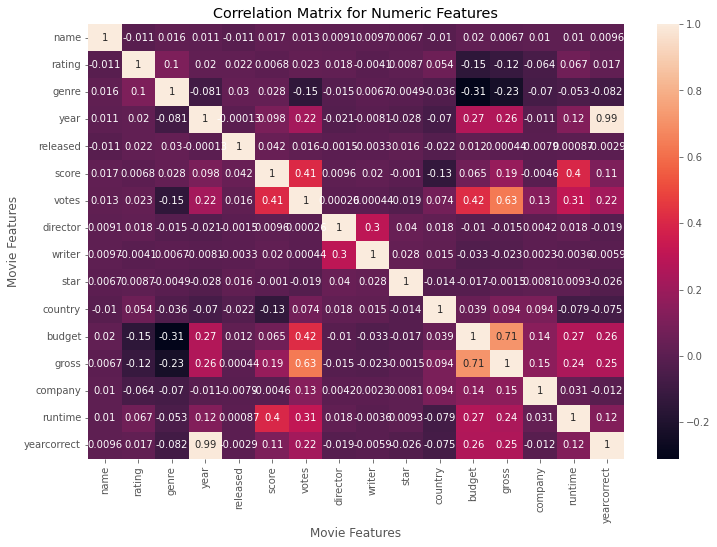

In [83]:
correlation_matrix=df_numeric.corr(method='pearson') 
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [84]:
df_numeric.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.010860  0.016355  0.011453 -0.010703  0.017095   
rating      -0.010860  1.000000  0.104108  0.019913  0.021628  0.006825   
genre        0.016355  0.104108  1.000000 -0.081261  0.030296  0.027959   
year         0.011453  0.019913 -0.081261  1.000000 -0.000128  0.097936   
released    -0.010703  0.021628  0.030296 -0.000128  1.000000  0.042324   
score        0.017095  0.006825  0.027959  0.097936  0.042324  1.000000   
votes        0.013086  0.022813 -0.145276  0.222810  0.016127  0.409182   
director     0.009079  0.018466 -0.015258 -0.020795 -0.001517  0.009559   
writer       0.009727 -0.004108  0.006700 -0.008146 -0.003336  0.019685   
star         0.006738  0.008705 -0.004879 -0.027724  0.015569 -0.000996   
country     -0.010397  0.053717 -0.036475 -0.069946 -0.022202 -0.134228   
budget       0.020368 -0.148372 -0.310566  0.265578  0.012240  0.064541   
gross        0.006721 -0.119666 -0.233674  0.260251  0.000440  0.185833   
company      0.010369 -0.064215 -0.070013 -0.011438 -0.007945 -0.004594   
runtime      0.010386  0.067179 -0.052701  0.120758  0.000867  0.399335   
yearcorrect  0.009553  0.017115 -0.082070  0.992136 -0.002919  0.105279   

                votes  director    writer      star   country    budget  \
name         0.013086  0.009079  0.009727  0.006738 -0.010397  0.020368   
rating       0.022813  0.018466 -0.004108  0.008705  0.053717 -0.148372   
genre       -0.145276 -0.015258  0.006700 -0.004879 -0.036475 -0.310566   
year         0.222810 -0.020795 -0.008146 -0.027724 -0.069946  0.265578   
released     0.016127 -0.001517 -0.003336  0.015569 -0.022202  0.012240   
score        0.409182  0.009559  0.019685 -0.000996 -0.134228  0.064541   
votes        1.000000  0.000260  0.000440 -0.019445  0.073829  0.421007   
director     0.000260  1.000000  0.299517  0.039692  0.017736 -0.010364   
writer       0.000440  0.299517  1.000000  0.028417  0.014766 -0.033237   
star        -0.019445  0.039692  0.028417  1.000000 -0.014388 -0.016935   
country      0.073829  0.017736  0.014766 -0.014388  1.000000  0.038881   
budget       0.421007 -0.010364 -0.033237 -0.016935  0.038881  1.000000   
gross        0.632334 -0.014808 -0.023036 -0.001520  0.094369  0.712717   
company      0.130638  0.004250  0.002315  0.008078  0.093959  0.142804   
runtime      0.309168  0.017623 -0.003638  0.009309 -0.079217  0.265289   
yearcorrect  0.219825 -0.018620 -0.005910 -0.025769 -0.074847  0.259179   

                gross   company   runtime  yearcorrect  
name         0.006721  0.010369  0.010386     0.009553  
rating      -0.119666 -0.064215  0.067179     0.017115  
genre       -0.233674 -0.070013 -0.052701    -0.082070  
year         0.260251 -0.011438  0.120758     0.992136  
released     0.000440 -0.007945  0.000867    -0.002919  
score        0.185833 -0.004594  0.399335     0.105279  
votes        0.632334  0.130638  0.309168     0.219825  
director    -0.014808  0.004250  0.017623    -0.018620  
writer      -0.023036  0.002315 -0.003638    -0.005910  
star        -0.001520  0.008078  0.009309    -0.025769  
country      0.094369  0.093959 -0.079217    -0.074847  
budget       0.712717  0.142804  0.265289     0.259179  
gross        1.000000  0.153545  0.244633     0.254601  
company      0.153545  1.000000  0.031037    -0.012498  
runtime      0.244633  0.031037  1.000000     0.121446  
yearcorrect  0.254601 -0.012498  0.121446     1.000000

In [85]:
correlation_mat=df_numeric.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.010860
             genre          0.016355
             year           0.011453
             released      -0.010703
             score          0.017095
             votes          0.013086
             director       0.009079
             writer         0.009727
             star           0.006738
             country       -0.010397
             budget         0.020368
             gross          0.006721
             company        0.010369
             runtime        0.010386
             yearcorrect    0.009553
rating       name          -0.010860
             rating         1.000000
             genre          0.104108
             year           0.019913
             released       0.021628
             score          0.006825
             votes          0.022813
             director       0.018466
             writer        -0.004108
             star           0.008705
             country        0.053717
 

In [86]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.310566
budget       genre         -0.310566
genre        gross         -0.233674
gross        genre         -0.233674
rating       budget        -0.148372
budget       rating        -0.148372
votes        genre         -0.145276
genre        votes         -0.145276
score        country       -0.134228
country      score         -0.134228
gross        rating        -0.119666
rating       gross         -0.119666
genre        yearcorrect   -0.082070
yearcorrect  genre         -0.082070
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.079217
country      runtime       -0.079217
             yearcorrect   -0.074847
yearcorrect  country       -0.074847
genre        company       -0.070013
company      genre         -0.070013
country      year          -0.069946
year         country       -0.069946
company      rating        -0.064215
rating       company       -0.064215
genre        runtime       -0.052701
r

In [87]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.632334
votes        gross          0.632334
budget       gross          0.712717
gross        budget         0.712717
yearcorrect  year           0.992136
year         yearcorrect    0.992136
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64